In [2]:
%matplotlib inline

from matplotlib import rc
import numpy as np
import pandas as pd

rc('font', family='Malgun Gothic')  # 윈도우
# rc('font', family='AppleGothic')  # 맥

# 데이터 읽기

In [173]:
train_df = pd.read_csv('./data/titanic/train.csv', index_col='PassengerId')
print(train_df.shape)
train_df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
test_df = pd.read_csv('./data/titanic/test.csv', index_col='PassengerId')
print(test_df.shape)
test_df.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [175]:
# # 가설 1 : 모두 산다.
# test_df['Survived'] = 1

# test_df[['Survived']].to_csv('제출.csv')

In [176]:
# # 가설 2 : 여자는 살고, 남자는 죽는다.
# mask = test_df['Sex'] == 'female'

# test_df.loc[mask, 'Survived'] = 1
# test_df.loc[~mask, 'Survived'] = 0

# test_df[['Survived']].to_csv('제출.csv')

# 머신러닝 알고리즘 적용

In [177]:
# # Feature 엔지니어링
# # mask = train_df['Age'].isnull()
# # train_df.loc[mask, 'Age'] = train_df['Age'].mean()

# # # mask = test_df['Sex'] == 'male'
# # # train_df.loc[mask, 'Sex-Code'] = 0
# # # mask = test_df['Sex'] == 'female'
# # # train_df.loc[mask, 'Sex-Code'] = 1
# # mapping_table = {'male': 0, 'female': 1}
# # train_df['Sex-Code'] = train_df['Sex'].map(mapping_table)

# # mask = test_df['Age'].isnull()
# # test_df.loc[mask, 'Age'] = test_df['Age'].mean()

# # mapping_table = {'male': 0, 'female': 1}
# # test_df['Sex-Code'] = test_df['Sex'].map(mapping_table)

# for data_df in [train_df, test_df]:
#     mask = data_df['Age'].isnull()
#     data_df['Age-Fill'] = data_df['Age']
#     data_df.loc[mask, 'Age-Fill'] = data_df['Age'].mean()

#     mapping_table = {'male': 0, 'female': 1}
#     data_df['Sex-Code'] = data_df['Sex'].map(mapping_table)

In [178]:
# # 사용할 컬럼만 지징해서 train/test 데이터를 준비
# feature_names = ['Sex-Code', 'Age-Fill']

# train_x = train_df[feature_names]
# train_y = train_df['Survived']

# test_x = test_df[feature_names]

In [179]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier  # Decision Tree
# # from sklearn.ensemble import RandomForestClassifier
# # from sklearn.naive_bayes import GaussianNB
# # from sklearn.svm import SVC

In [180]:
# clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(train_x, train_y)

In [181]:
# test_df['Survived'] = clf.predict(test_x)
# test_df[['Survived']].to_csv('제출.csv')

In [182]:
train_df.shape

(891, 11)

In [183]:
train_df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [184]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [185]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


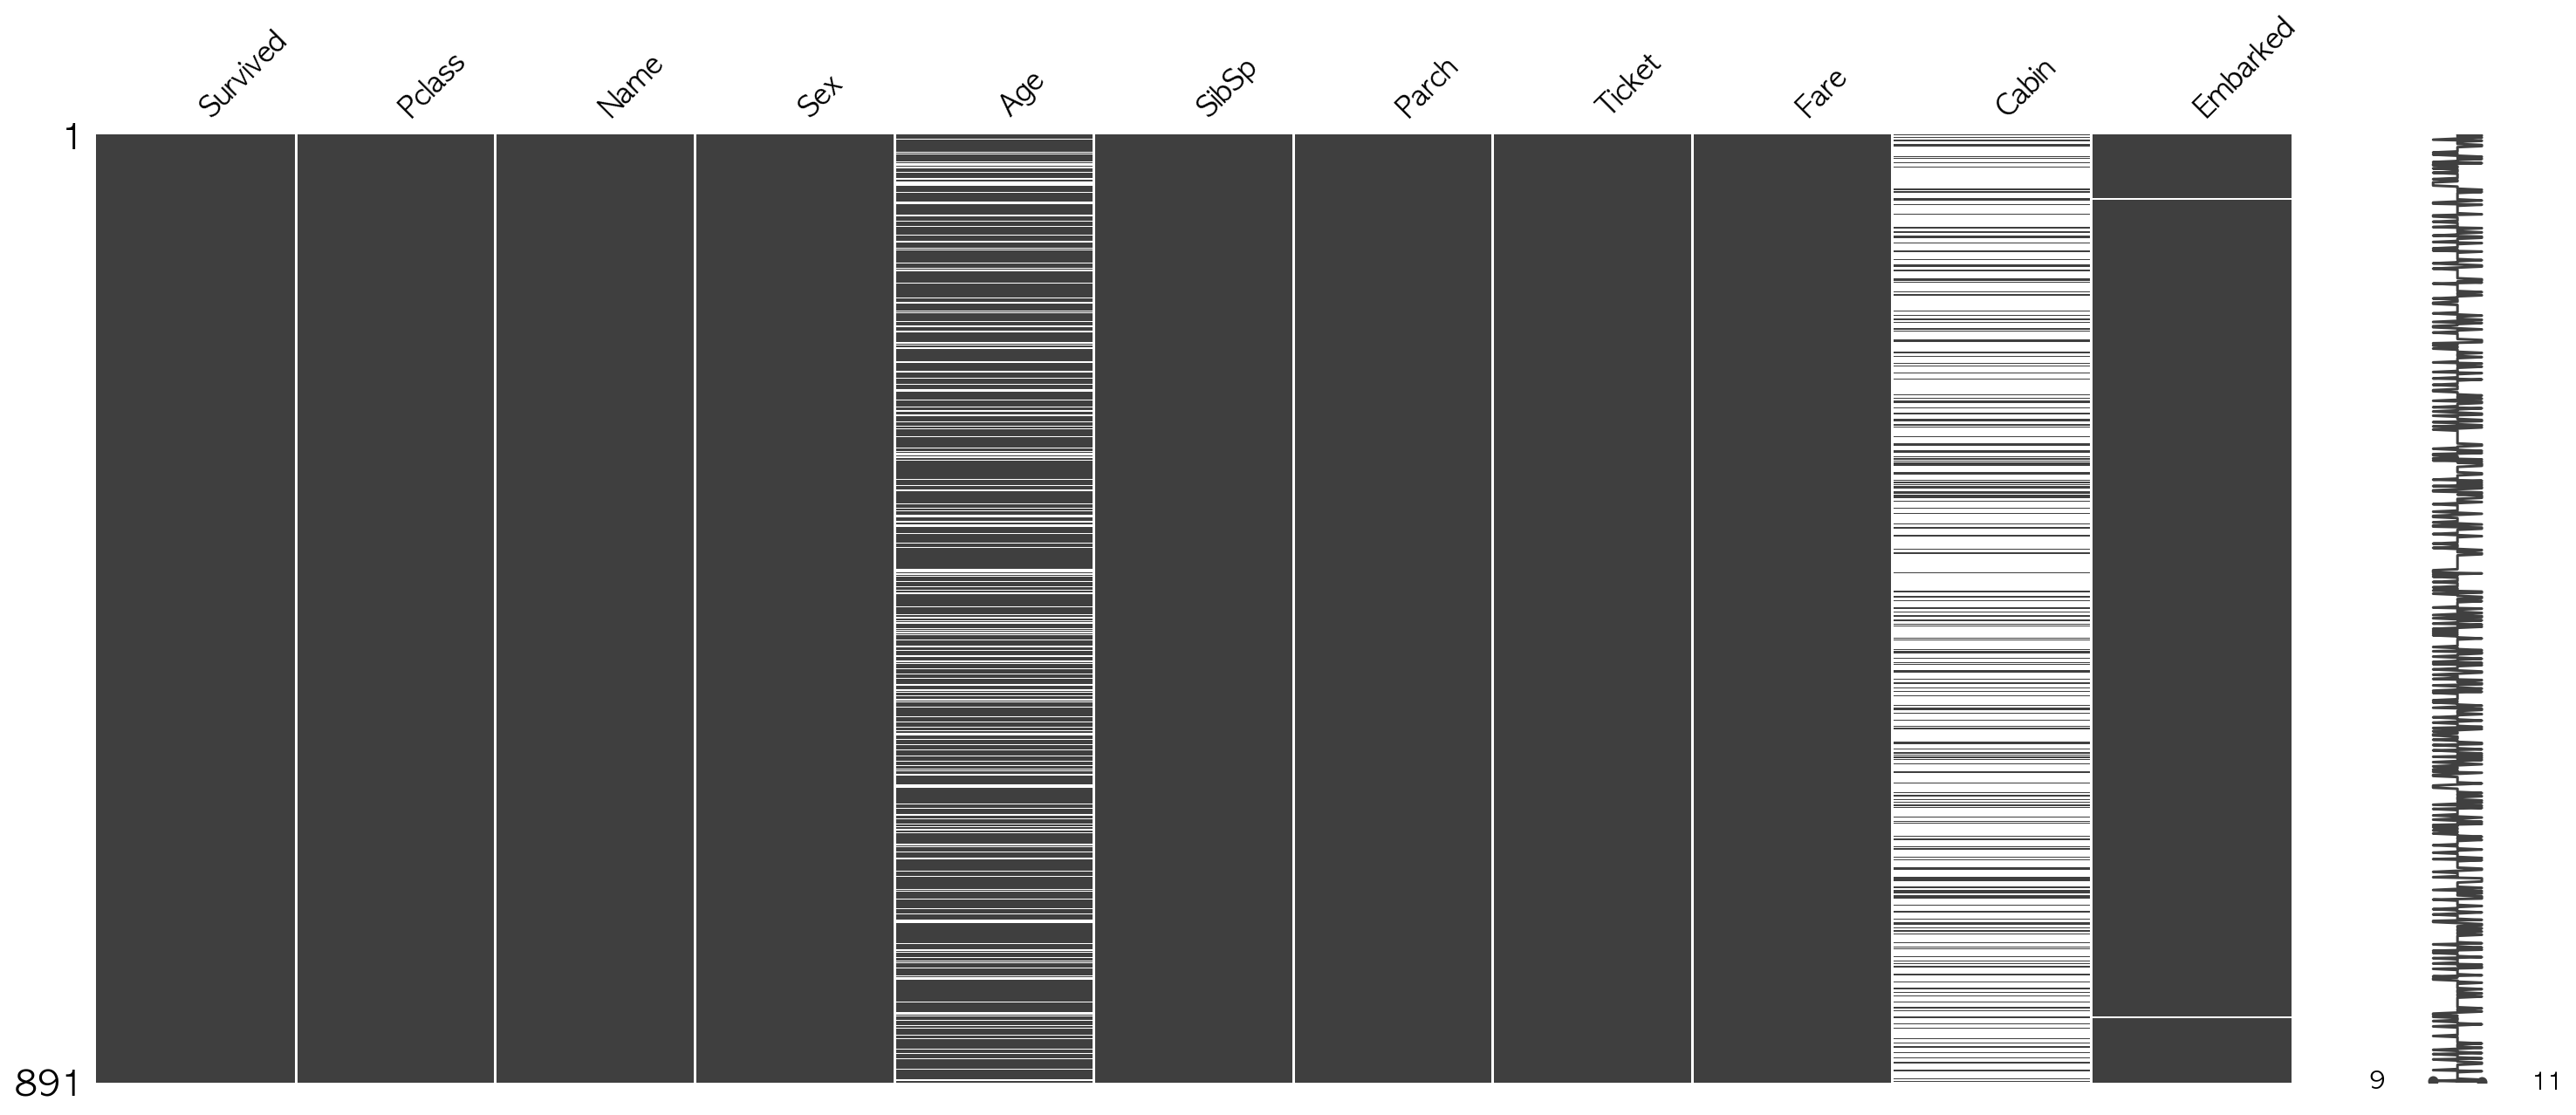

In [186]:
import missingno as msno

msno.matrix(train_df)

# 문제 1

타이타닉의 train 데이터에서 1) 전체 생존률과 2) 생존자의 총 인원수, 사망자의 총 인원수를 구하세요.

In [191]:
전체_생존률 = round(100 * train_df.Survived.mean(), 2)
전체_생존률

38.38

In [192]:
train_df.Survived.unique()

array([0, 1])

In [196]:
series = train_df.Survived.value_counts()
사망자수, 생존자수 = series

In [197]:
전체_생존률, 사망자수, 생존자수

(38.38, 549, 342)

# 문제 2

`Survived` 컬럼에는 0/1 값이 있습니다. 이는 직관적이지 않기에, 이를 표현하는 별도 컬럼 `Survived-Label`을 만들어봅시다.

+ `0` : `사망`
+ `1` : `생존`

In [201]:
# def fn(value):
#     if value == 1:
#         return '생존'
#     return '사망'
# train_df['Survived-Label'] = train_df.Survived.apply(fn)

mapping_dict = {1: '생존', 0: '사망'}
train_df['Survived-Label'] = train_df.Survived.map(mapping_dict)

train_df[['Survived', 'Survived-Label']].head()

,Survived,Survived-Label
PassengerId,,
1,0,사망
2,1,생존
3,1,생존
4,1,생존
5,0,사망


# 문제 3

`문제 2`와 마찬가지로, `Pclass` 컬럼 역시 `Pclass-Label` 컬럼을 만들어봅시다.

+ `1` : `퍼스트 클래스`
+ `2` : `비즈니스`
+ `3` : `이코노미`

In [212]:
mapping_dict = {1: '1-퍼스트 클래스', 2: '2-비즈니스', 3: '3-이코노미'}
train_df['Pclass-Label'] = train_df.Pclass.map(mapping_dict)

train_df[['Pclass', 'Pclass-Label']].head()

,Pclass,Pclass-Label
PassengerId,,
1,3,3-이코노미
2,1,1-퍼스트 클래스
3,3,3-이코노미
4,1,1-퍼스트 클래스
5,3,3-이코노미


# 문제 4

`Pclass`별 생존율을 출력해봅시다.

Hint) `pivot_table`이나 `groupby`를 활용해볼 수 있습니다.

In [213]:
train_df.Survived.mean()

0.3838383838383838

In [214]:
mask = train_df.Pclass == 1
train_df.loc[mask, 'Survived'].mean()

0.6296296296296297

In [219]:
train_df.pivot_table(
    index='Pclass-Label',
    values='Survived',
    aggfunc='mean'  # 원하는 함수를 직접 구현해서 지정하실 수 있습니다.
).sort_index()

,Survived
Pclass-Label,
1-퍼스트 클래스,0.629630
2-비즈니스,0.472826
3-이코노미,0.242363


In [218]:
train_df.groupby('Pclass-Label')['Survived'].mean().sort_index()

Pclass-Label
1-퍼스트 클래스    0.629630
2-비즈니스       0.472826
3-이코노미       0.242363
Name: Survived, dtype: float64

# 문제 5

`Embarked` 컬럼도 마찬가지로 `Embarked-Label` 컬럼을 만들어봅시다.

- `C` : `Cherbourg`
- `S` : `Southampton`
- `Q` : `Queenstown`

In [221]:
mapping_dict = {
    'C' : 'Cherbourg',
    'S' : 'Southampton',
    'Q' : 'Queenstown',
}
train_df['Embarked-Label'] = train_df.Embarked.map(mapping_dict)

train_df[['Embarked', 'Embarked-Label']].head()

,Embarked,Embarked-Label
PassengerId,,
1,S,Southampton
2,C,Cherbourg
3,S,Southampton
4,S,Southampton
5,S,Southampton


# 문제 6

`Embarked-Label`별 생존율을 출력해보세요.

In [222]:
train_df.pivot_table(
    index='Embarked-Label',
    values='Survived',
    aggfunc='mean',
)

,Survived
Embarked-Label,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


# 문제 7 : One Hot Encoding

`Pclass` 컬럼에 대해, `Pclass-1`, `Pclass-2`, `Pclass-3` 컬럼을 만들어주세요.

+ `Pclass-1` : `Pclass=1`이면 `True`, 아니면 `False`
+ `Pclass-2` : `Pclass=2`이면 `True`, 아니면 `False`
+ `Pclass-3` : `Pclass=3`이면 `True`, 아니면 `False`

In [227]:
def make_fn(기준값):
    def fn(pclass):
        return pclass == 기준값
    return fn

train_df['Pclass-1'] = train_df.Pclass.apply(make_fn(1))
train_df['Pclass-2'] = train_df.Pclass.apply(make_fn(2))
train_df['Pclass-3'] = train_df.Pclass.apply(make_fn(3))

train_df[['Pclass', 'Pclass-1', 'Pclass-2', 'Pclass-3']].head()

,Pclass,Pclass-1,Pclass-2,Pclass-3
PassengerId,,,,
1,3,False,False,True
2,1,True,False,False
3,3,False,False,True
4,1,True,False,False
5,3,False,False,True


In [233]:
def fn(pclass):
    return {
        'Pclass-1': (pclass==1),
        'Pclass-2': (pclass==2),
        'Pclass-3': (pclass==3),
    }

# TODO: 한 방에 DataFrame을 만들어서,
# train_df 우측에 concat를 해볼 수 있겠습니다.
# train_df.Pclass.apply(fn)

# 문제 8

`Age` 컬럼에 대해, 다음 정보를 출력해주세요.

+ 평균 (mean)
+ 분산 (standard deviation, std)
+ 가장 많은 나이 (max)
+ 가장 적은 나이 (min)

> `.describe()` 를 활용해보실 수도 있습니다.

In [236]:
train_df.Age.mean()  # 평균

29.69911764705882

In [241]:
train_df.Age.median()  # 중위값

28.0

In [237]:
train_df.Age.std()

14.526497332334044

In [238]:
train_df.Age.max()

80.0

In [239]:
train_df.Age.min()

0.42

In [247]:
train_df.Age.describe(
    percentiles=np.arange(0.1, 1, 0.1)
)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
20%       19.000000
30.0%     22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: Age, dtype: float64

# 문제 9

객실 등급(`Pclass`)별 `Age` 평균을 구하세요.

In [249]:
train_df.pivot_table(
    index='Pclass-Label',
    values='Age',
    aggfunc='mean'
)

,Age
Pclass-Label,
1-퍼스트 클래스,38.233441
2-비즈니스,29.877630
3-이코노미,25.140620


# 문제 10

다음 `Age` 구간 마다의 생존율을 구하세요.

+ 나이가 15세 미만인 승객.
+ 나이가 15세 이상이고 30세 미만인 승객.
+ 나이가 30세 이상인 승객.

In [250]:
mask = train_df.Age < 15
train_df.loc[mask, 'Survived'].mean()

0.5769230769230769

In [251]:
mask = (train_df.Age >= 15) & (train_df.Age < 30)
train_df.loc[mask, 'Survived'].mean()

0.3627450980392157

In [252]:
mask = train_df.Age >= 30
train_df.loc[mask, 'Survived'].mean()

0.40606060606060607

In [262]:
def fn(age):
    if age < 15:
        return '소년/소녀'
    elif 15 <= age < 30:
        return '청년'
    elif age >= 30:
        return '장년'
    return None
    
train_df['연령대'] = train_df.Age.apply(fn)

train_df.pivot_table(
    index='연령대',
    values='Survived',
    aggfunc='mean'
)

,Survived
연령대,
소년/소녀,0.576923
장년,0.406061
청년,0.362745


# 문제 11

`Age`가 `NaN`인 승객의 생존율과 아닌 승객의 생존율을 구하세요.

In [265]:
mask = train_df.Age.isna()
train_df.loc[mask, 'Survived'].mean()

0.2937853107344633

In [266]:
mask = train_df.Age.notna()
train_df.loc[mask, 'Survived'].mean()

0.4061624649859944

# 문제 12

`Age`가 `NaN`인 승객의 `Age`에, 그 승객이 속한 `Pclass`의 `Age` 평균을 대입해주세요.

In [272]:
for pclass in train_df.Pclass.unique():
    mask = train_df.Pclass == pclass
    age_mean = train_df.loc[mask, 'Age'].mean()
    train_df.loc[mask & (train_df.Age.isna()), 'Age'] = age_mean

In [277]:
train_df.Age.isna().sum()

0

# 문제 13

형제/자매/배우자(SibSp)도 없고, 부모/자식(Parch)도 없는 사람을 `싱글`이라 하겠습니다. `싱글` 컬럼을 만들어주시고 `싱글` 여부에 따른 생존율을 구해주세요.

In [281]:
train_df['싱글'] = (train_df.SibSp + train_df.Parch == 0)
train_df[['SibSp', 'Parch', '싱글']].head(10)

,SibSp,Parch,싱글
PassengerId,,,
1,1,0,False
2,1,0,False
3,0,0,True
4,1,0,False
5,0,0,True
6,0,0,True
7,0,0,True
8,3,1,False
9,0,2,False


# 문제 14

`가족수` 컬럼을 만들어주세요. `가족수 = SibSp + Parch + 1` 수식을 따릅니다.

그리고, `가족수`별 생존율도 구해주세요.

In [282]:
train_df['가족수'] = (train_df.SibSp + train_df.Parch + 1)
train_df[['SibSp', 'Parch', '가족수']].head()

,SibSp,Parch,가족수
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [285]:
train_df.pivot_table(
    index='가족수',
    values='Survived',
    aggfunc=['mean', 'sum']
)

,mean,sum
,Survived,Survived
가족수,,
1,0.303538,163
2,0.552795,89
3,0.578431,59
4,0.724138,21
5,0.200000,3
6,0.136364,3
7,0.333333,4
8,0.000000,0


# 문제 15

`가족수` 컬럼이 너무 세분화되어있습니다. 이를 구역으로 나눠보겠습니다.

+ `싱글` : `가족수<=1`
+ `핵가족` : `1<가족수<5`
+ `대가족` : `가족수>=5`

위를 참조해서 `가족형태` 컬럼을 만들어주시고, `가족형태`별 생존율을 구해주세요.

In [287]:
def fn(가족수):
    if 가족수 <= 1:
        return '싱글'
    elif 1 < 가족수 < 5:
        return '핵가족'
    elif 가족수 >= 5:
        return '대가족'
    return None
    
train_df['가족형태'] = train_df.가족수.apply(fn)

train_df.pivot_table(
    index='가족형태',
    values='Survived',
    aggfunc='mean'
)

,Survived
가족형태,
대가족,0.161290
싱글,0.303538
핵가족,0.578767


# 문제 16 : One Hot Encoding

`가족형태` 컬럼에 대해, `가족형태-싱글`, `가족형태-핵가족`, `가족형태-대가족` 컬럼을 만들어주세요.

+ `가족형태_싱글` : `가족형태=싱글`이면 True, 아니면 False
+ `가족형태_핵가족` : `가족형태=핵가족`이면 True, 아니면 False
+ `가족형태_대가족` : `가족형태=대가족`이면 True, 아니면 False

In [292]:
가족형태_df = pd.get_dummies(train_df['가족형태'], prefix='가족형태', prefix_sep='_')

train_df = pd.concat([train_df, 가족형태_df], axis='columns')

train_df[['가족형태', '가족형태_싱글', '가족형태_핵가족', '가족형태_대가족']].head()

,가족형태,가족형태_싱글,가족형태_싱글,가족형태_핵가족,가족형태_핵가족,가족형태_대가족,가족형태_대가족
PassengerId,,,,,,,
1,핵가족,0,0,1,1,0,0
2,핵가족,0,0,1,1,0,0
3,싱글,1,1,0,0,0,0
4,핵가족,0,0,1,1,0,0
5,싱글,1,1,0,0,0,0


# 문제 17

`Name` 컬럼은 `성, 호칭. 이름` 구조를 가지고 있습니다. `호칭`을 추출해서, `호칭` 컬럼에 저장해주세요.

그리고, `호칭`별 생존율을 구해주세요.

In [293]:
train_df.iloc[0].Name

'Braund, Mr. Owen Harris'

In [294]:
name = 'Braund, Mr. Owen Harris'

In [300]:
호칭 = name.split(',')[1].split('.')[0].strip()
호칭

'Mr'

In [302]:
import re  # 정규 표현식 (Regular Expression)

re.split('[,.]', name)[1].strip()

'Mr'

In [307]:
train_df['호칭'] = train_df.Name.str.split('[,.]', expand=True)[1]
train_df[['Name', '호칭']].head()

,Name,호칭
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


In [308]:
def fn(name):
    return name.split(',')[1].split('.')[0].strip()

train_df['호칭'] = train_df.Name.apply(fn)
train_df[['Name', '호칭']].head()

,Name,호칭
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


In [324]:
train_df.호칭.value_counts()  #[4:].sum()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Jonkheer          1
Ms                1
Capt              1
the Countess      1
Sir               1
Don               1
Mme               1
Name: 호칭, dtype: int64

In [309]:
train_df.pivot_table(
    index='호칭',
    values='Survived',
)

,Survived
호칭,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


# 문제 18

낮은 모수의 `호칭`들을 정리해봅시다.

`Mr`, `Mrs`, `Miss`, `Master`가 거의 대부분입니다. 이 외의 `호칭`은 `Other`로 정리해봅시다.

그리고, `호칭`별 생존율을 다시 구해봅시다.

In [314]:
laugnage = input("좋아하는 언어가 뭐야? ")
if laugnage.lower() in ['python', 'javascript']:
    print("나랑 같네!")
else:
    print("다르네~")

좋아하는 언어가 뭐야? PYTHon
나랑 같네!


In [325]:
mask = ~train_df.호칭.isin(['Mr', 'Mrs', 'Miss', 'Master'])
train_df.loc[mask, '호칭'] = 'Other'

In [326]:
train_df.호칭.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: 호칭, dtype: int64

In [327]:
train_df.pivot_table(
    index='호칭',
    values='Survived',
)

,Survived
호칭,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Other,0.444444


# 문제 19

`결혼유무` 컬럼을 만들어봅시다.

+ `호칭`이 `Mr`, `Mrs` 이면 : `True`
+ `호칭`이 `Master`, `Miss` 이면 : `False`
+ 나머지 `호칭`은 `NaN` 그대로 둡시다.

`결혼유무`별 생존율을 구해봅시다.

In [329]:
mapping_dict = {
    'Mr': True,
    'Mrs': True,
    'Master': False,
    'Miss': False,
#     'Other': None,
}

train_df['결혼유무'] = train_df.호칭.map(mapping_dict)

train_df[['호칭', '결혼유무']].head()

,호칭,결혼유무
PassengerId,,
1,Mr,True
2,Mrs,True
3,Miss,False
4,Mrs,True
5,Mr,True


In [330]:
train_df.pivot_table(
    index='결혼유무',
    values='Survived'
)

,Survived
결혼유무,
False,0.675676
True,0.280374
